<a href="https://colab.research.google.com/github/vincentdmai/learn_ml_jupyter_collection/blob/main/svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [ ]:
print(X)

# Must reshape Y to be 2D array, same shape as X
Y = Y.reshape(len(Y), 1)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
# We need to apply feature scaling because the level is significantly different in ranges than the salary
# Feature scaling typically not for one-hot-encoded types of data
# Must apply then for SVR's features and dependent variables
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

# Use separate standard scalars
sc_y = StandardScaler()
Y = sc_y.fit_transform(Y)


In [ ]:
print(X)
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR Model on the Entire Dataset

In [ ]:
from sklearn.svm import SVR

# SVR must contain kernels (we'll be using the Gaussian Radial Basis Function)
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting new result

In [ ]:
# E.g. for x = 6.5

# Remember y was scaled with the Standard Scaler, so we must REVERSE the scaling
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualizing the SVR Results

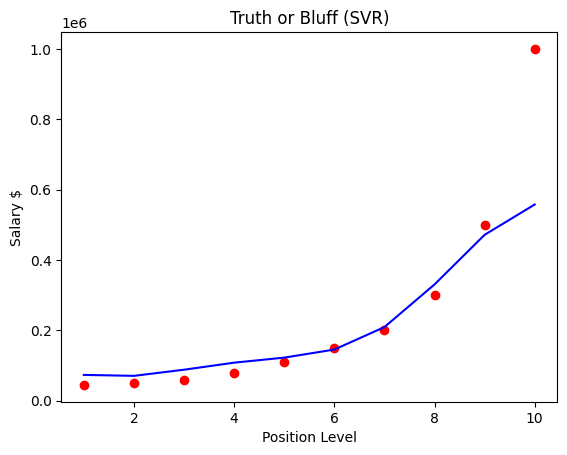

In [ ]:
# Remeber... MUST REVERSE SCALING

# X already has been scaled
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary $')
plt.show()

## SVR Visualization in Higher Resolution

<ipython-input-32-aa83b4e6583d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)


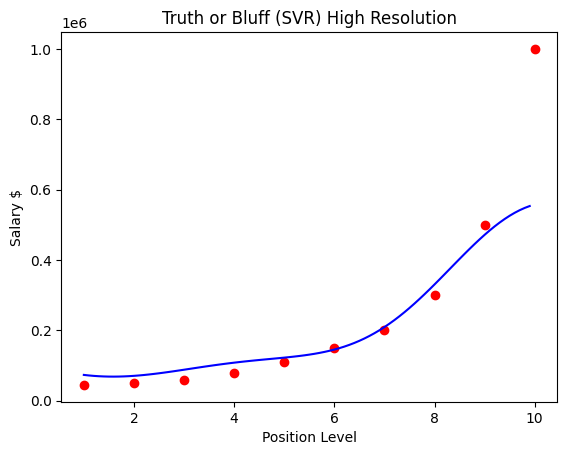

In [ ]:
# Remeber... MUST REVERSE SCALING
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# X already has been scaled
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (SVR) High Resolution')
plt.xlabel('Position Level')
plt.ylabel('Salary $')
plt.show()